**Question 1** : In the folowing definition of a probabilistic model:

$Y \sim \mathcal{N}(\mu, \sigma)$

$\mu \sim \mathcal{N}(0, 2)$

$\sigma \sim \mathcal{halfnormal}(0.75)$

1.1 - Identify the prior and the likelihood.

1.2  - How many parameters will the posterior have?

1.3 - Compare it with the model for the coin-flipping problem.

1.4 - Write Bayes' theorem for the model.


In [ ]:
## Use Latex to write mathematical equations in markdown

Ans-1.1 **Prior**:  $\mu \sim \mathcal{N}(0, 2)$
          Represents prior distribution of mean(μ) of Y.Conveys the information that prior is a normal distribution centred at 0 with a variance of 2.                                                
        **Likelihood**:  $Y \sim \mathcal{N}(\mu, \sigma)$
        Represents probability of observing a particular value Y given mean(μ) and standard deviation(σ).Conveys the information that likelihood is a normal dstribution centred at μ with a standard deviation of σ.   

Ans-1.2 The posterior will have three parameters in total-mean,variance,standard deviation. Mean will depend on observed data(Y), prior mean(0), prior variance(2) and likelihood variance(σ^2). Variance will depend on observed data(Y), prior variance(2) and likelihood variance(σ^2).Standard deviation is simply the squareroot of posterior variance.

Ans-1.3 Comparison with the coin-flipping problem:
Key differences are as follows: The coin flipping problem uses beta function for prior and binomial function for likelihood so that overall posterior distribution is a beta function. While here normal distribution is used for both prior and likelihood. Also, this model has three parameters (μ,σ,posterior parameters) while the coin flipping problem model has only one parameter(p). This model is suitable to deal with continous variables while the model in coin flipping model deals with binary data (heads/tails).

Ans-1.4 Bayes' theorem relates the prior (π(μ, σ)), likelihood (L(y | μ, σ)), and posterior (π(μ, σ | y)) distributions:

**π(μ, σ | Y) = L(Y | μ, σ) * π(μ, σ) / ∫∫ L(Y | μ', σ') * π(μ', σ') dμ' dσ'**                               
-->π(μ, σ): This symbolizes the joint prior distribution, capturing our initial understanding of how likely different combinations of μ and σ are.                                                      
-->L(Y | μ, σ): This represents the probability of observing the specific data value (Y) given the values of μ and σ. It tells us how well the model with those μ and σ values fits the data.                                          
 -->π(μ, σ | Y): This represents the posterior distribution, which combines the prior belief (π(μ, σ)) with the information from the data (L(Y | μ, σ)). It tells us how likely different combinations of μ and σ are after considering the observed data (Y).

**Question 2**

Let’s suppose that we have two coins; when we toss the first coin, half of the time it lands on tails
 and half of the time on heads. The other coin is a loaded coin that always lands on heads. If we take
 one of the coins at random and get a head, what is the probability that this coin is the unfair one?

Ans- We have two coins- one fair and one loaded so that it ends up as heads. Analyzing prior and likelihood for the two coins and using posterior analysis to get the probability that the coin chosen is the unfair one:                     
Prior(Fair): Probability of picking the fair coin=0.5                              
Prior(Loaded):Probability of picking the loaded coin=0.5                           
Likelihood(Fair): Probability of getting heads from the fair coin=0.5            
Likelihood(Loaded): Probability of getting heads from the loaded coin=1.0        
Posterior(Loaded): Probability of getting loaded coin given heads=
                 (0.5 x 1.0)/((0.5 x 1.0)+(0.5 x 0.5))= 0.667                     
In other words, there's a two-thirds chance that the heads outcome came from the unfair (loaded) coin.

This makes sense intuitively. Since the loaded coin always lands on heads, observing heads strengthens the belief that it was the one chosen, compared to the fair coin that could have landed on either heads or tails.

**Question 3**


Using PyMC, change the parameters of the prior Beta distribution in `our_first_model` to match those of Week 2. Compare the results.

In [ ]:
# Setting up the dependencies:
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz

In [ ]:
az.style.use("arviz-grayscale")
from cycler import cycler
default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc('axes', prop_cycle=default_cycler)
plt.rc('figure', dpi=300)

In [ ]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = pz.Binomial(n = 1, p = theta_real).rvs(trials)
data

array([1, 0, 0, 0])

In [ ]:
params = [0.8, 1, 4]
for i in params:
        for j in params:
            with pm.Model() as our_first_model:
                     θ = pm.Beta('θ', alpha=i, beta=j)
                     y = pm.Bernoulli('y', p=θ, observed=data)
                     idata = pm.sample(1000, random_seed=4591)

array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>]],
      dtype=object)

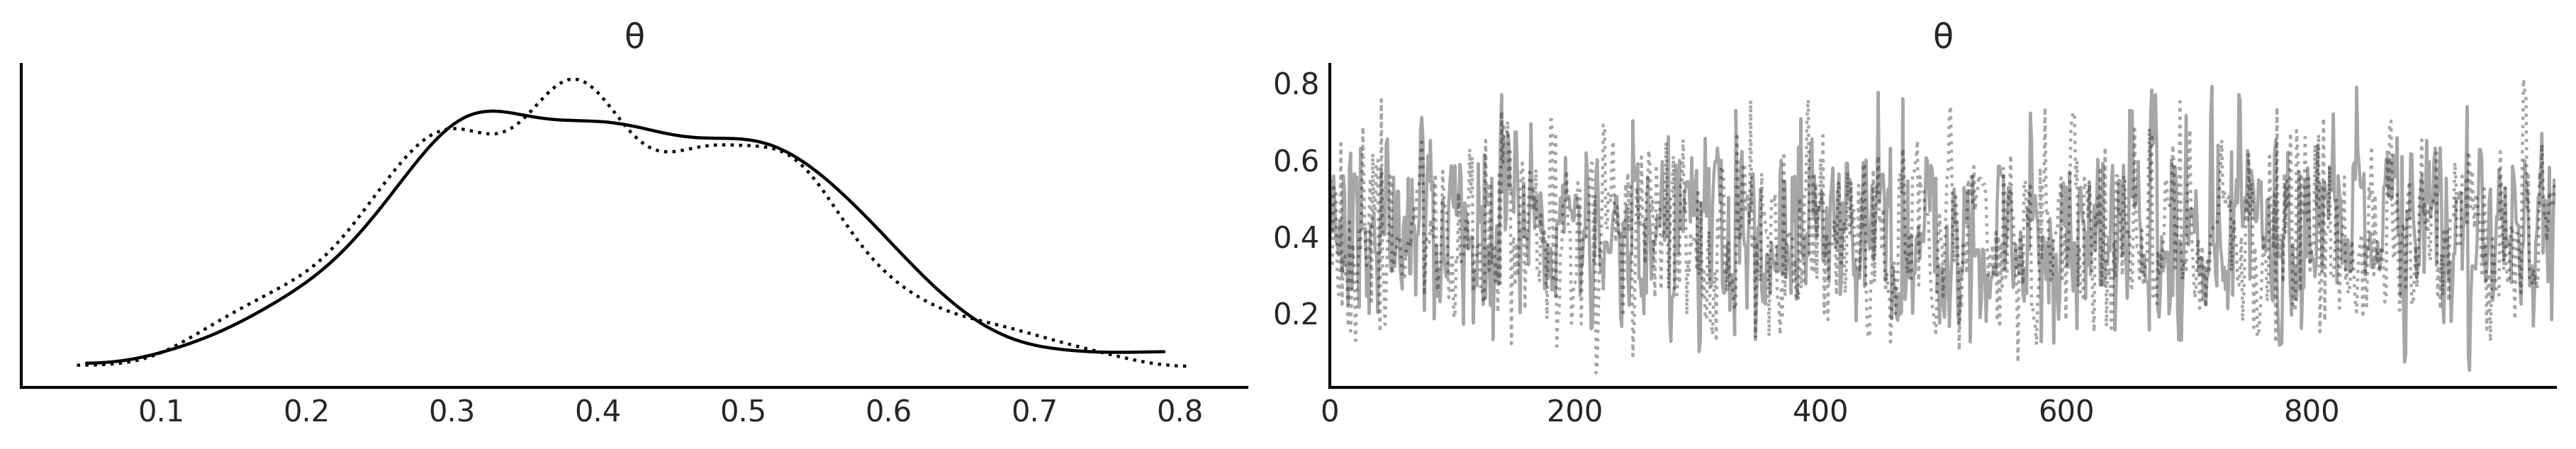

In [ ]:
az.plot_trace(idata)

Above two represent trace plot and Kernel Density Estimation(KDE) respectively.The two plots obtained are very different from the one when alpha and beta are both set to 1.0 as seen earlier in week3. Also, we can observe maxima near 0.4 where when both alpha and beta are set to 1.0 then maxima is observed near 0.2-0.25

array([[<Axes: title={'center': 'θ'}>,
        <Axes: title={'center': 'θ'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

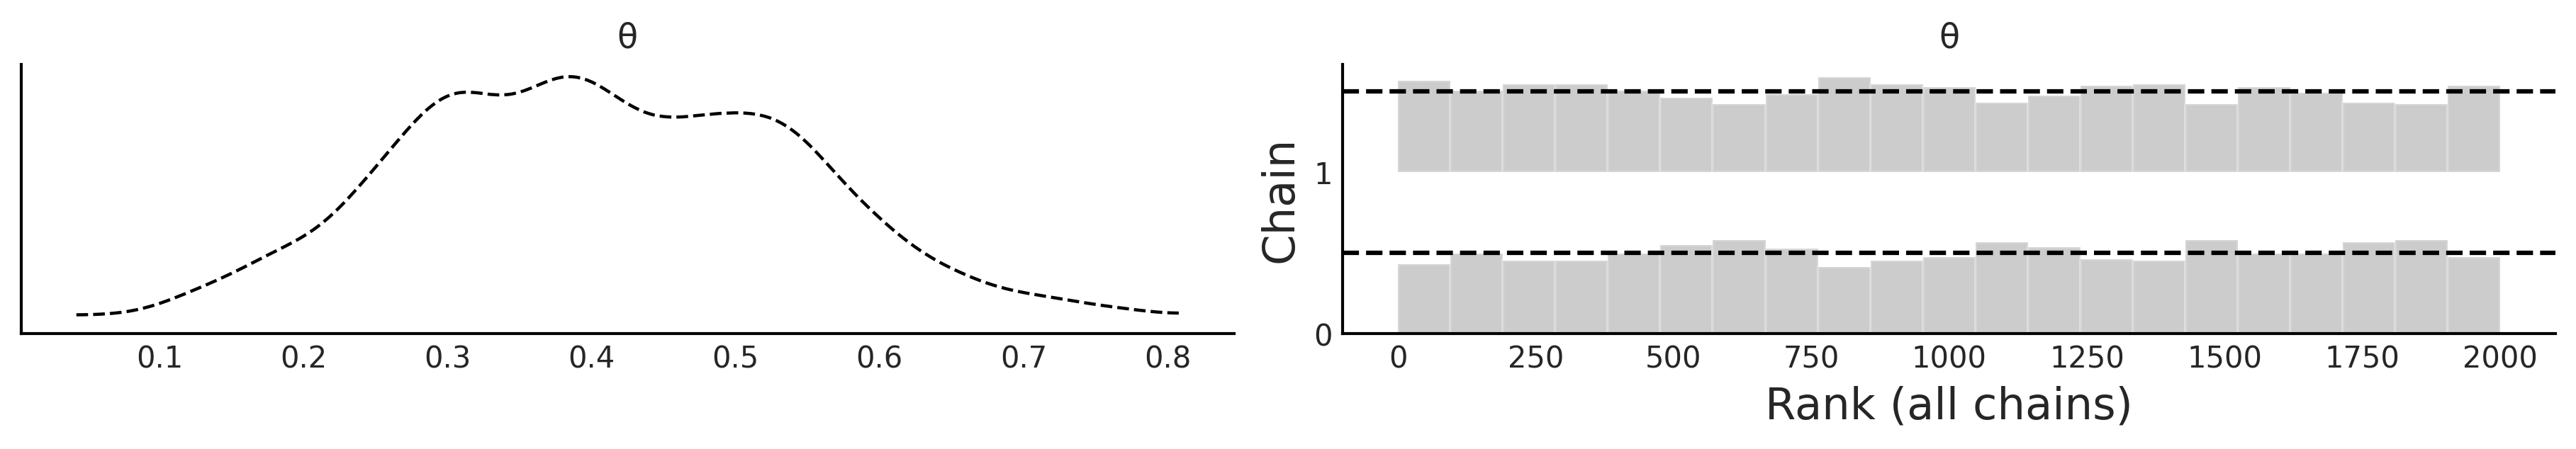

In [ ]:
az.plot_trace(idata, kind="rank_bars", combined=True, rank_kwargs={"colors": "k"})

Here we can observe that 2 chains are involved in sampling rather than 4 chains.Some small deviations from uniformity are expected due to random sampling, but large deviations indicate that chains are exploring different regions of the posterior.

In [ ]:
az.summary(idata, kind="stats").round(2)

,mean,sd,hdi_3%,hdi_97%
θ,0.41,0.14,0.16,0.65


Here, we can see more interesting stats about the plot. Mean here is 0.41 whereas the one seen before where α=β=1.0, mean was 0.34. Here,sd is 0.14 whereas there sd was 0.18. Here, 97% HDI is obtained at 0.65 whereas in other case it was obtained at 0.67. Here, still we can see that stats in both cases are somewhat close to each other.

<Axes: title={'center': 'θ'}>

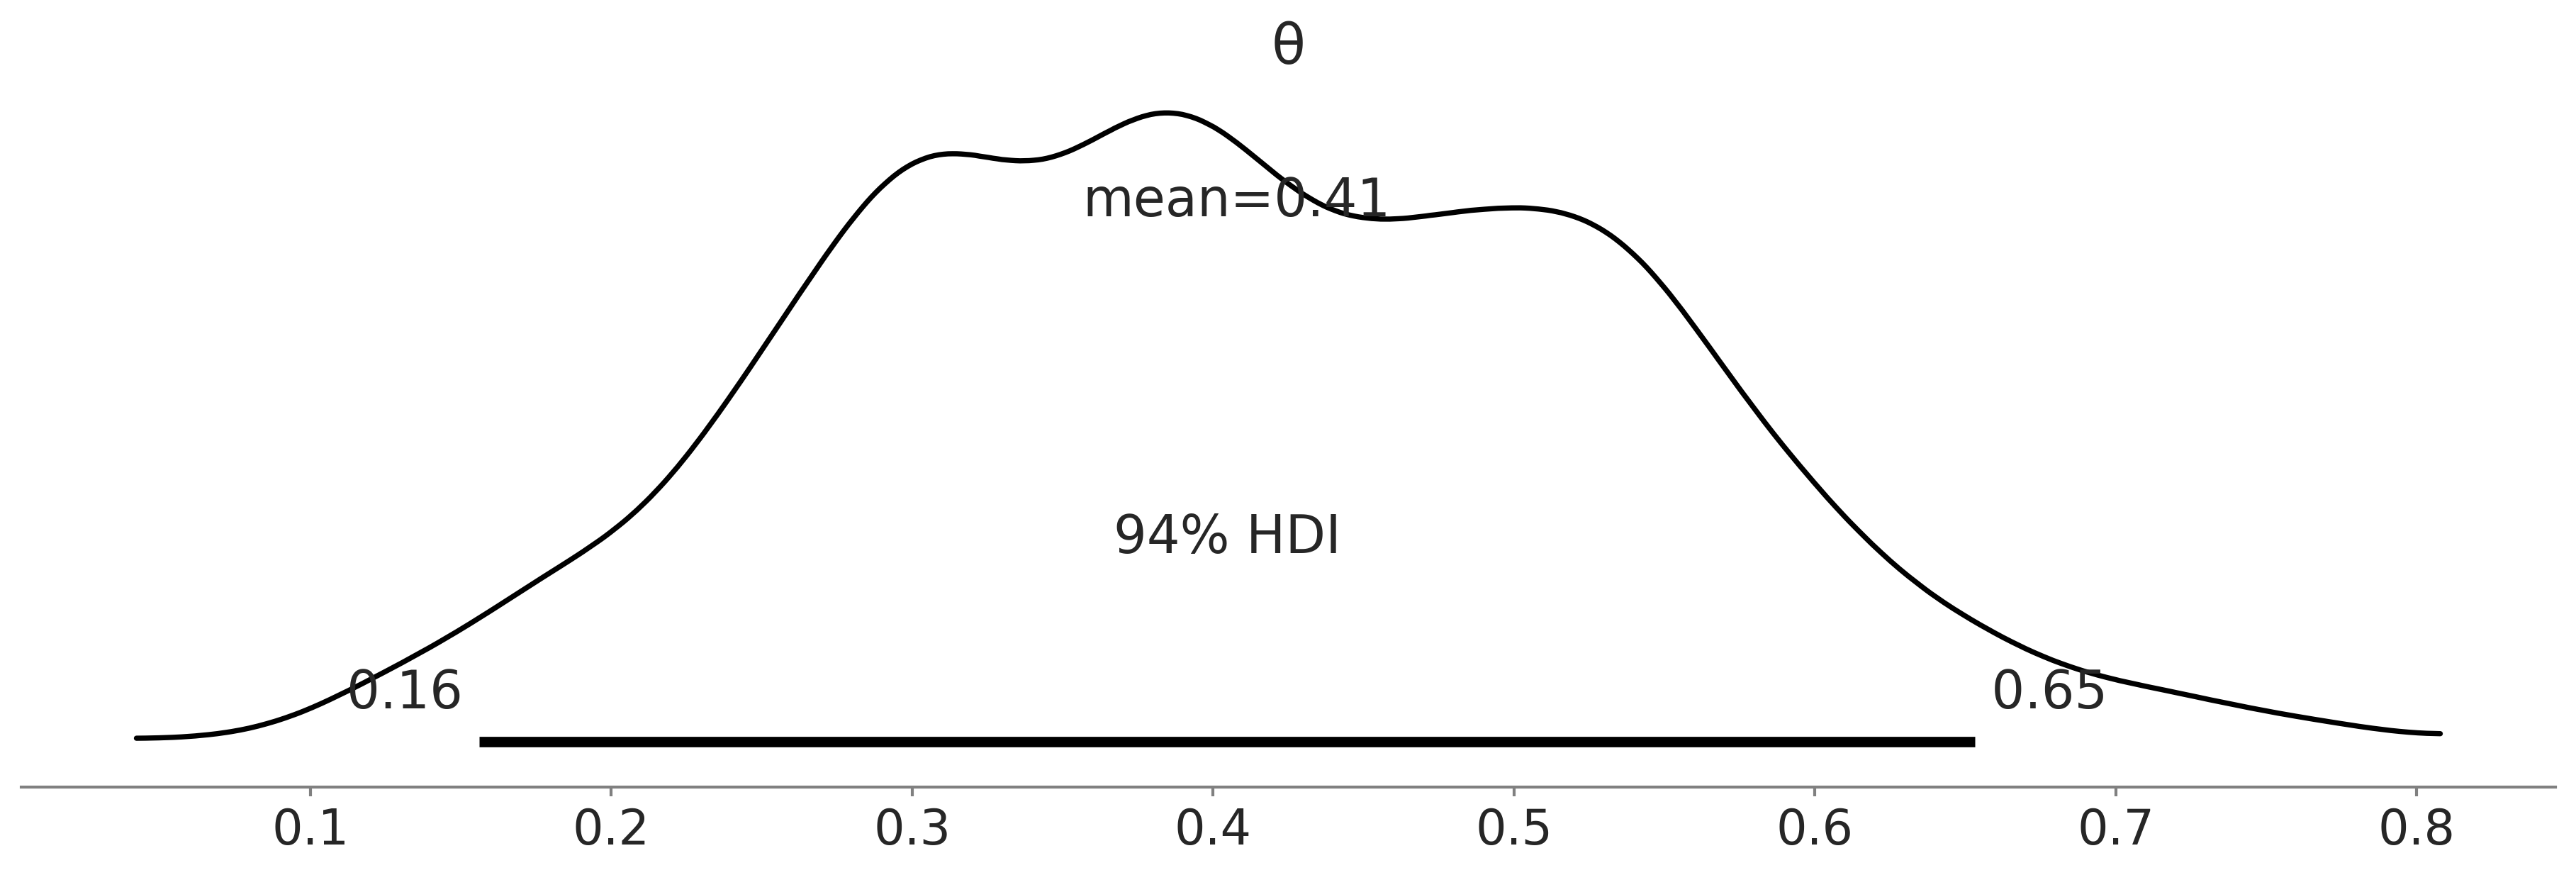

In [ ]:
az.plot_posterior(idata, figsize=(12, 4))

Above shows the posterior plot of idata obtained from sampling.

({'BF10': 0.41533164206446993, 'BF01': 2.4077144592917263},
 <Axes: title={'center': 'The BF_10 is 0.42\nThe BF_01 is 2.41'}, xlabel='θ', ylabel='Density'>)

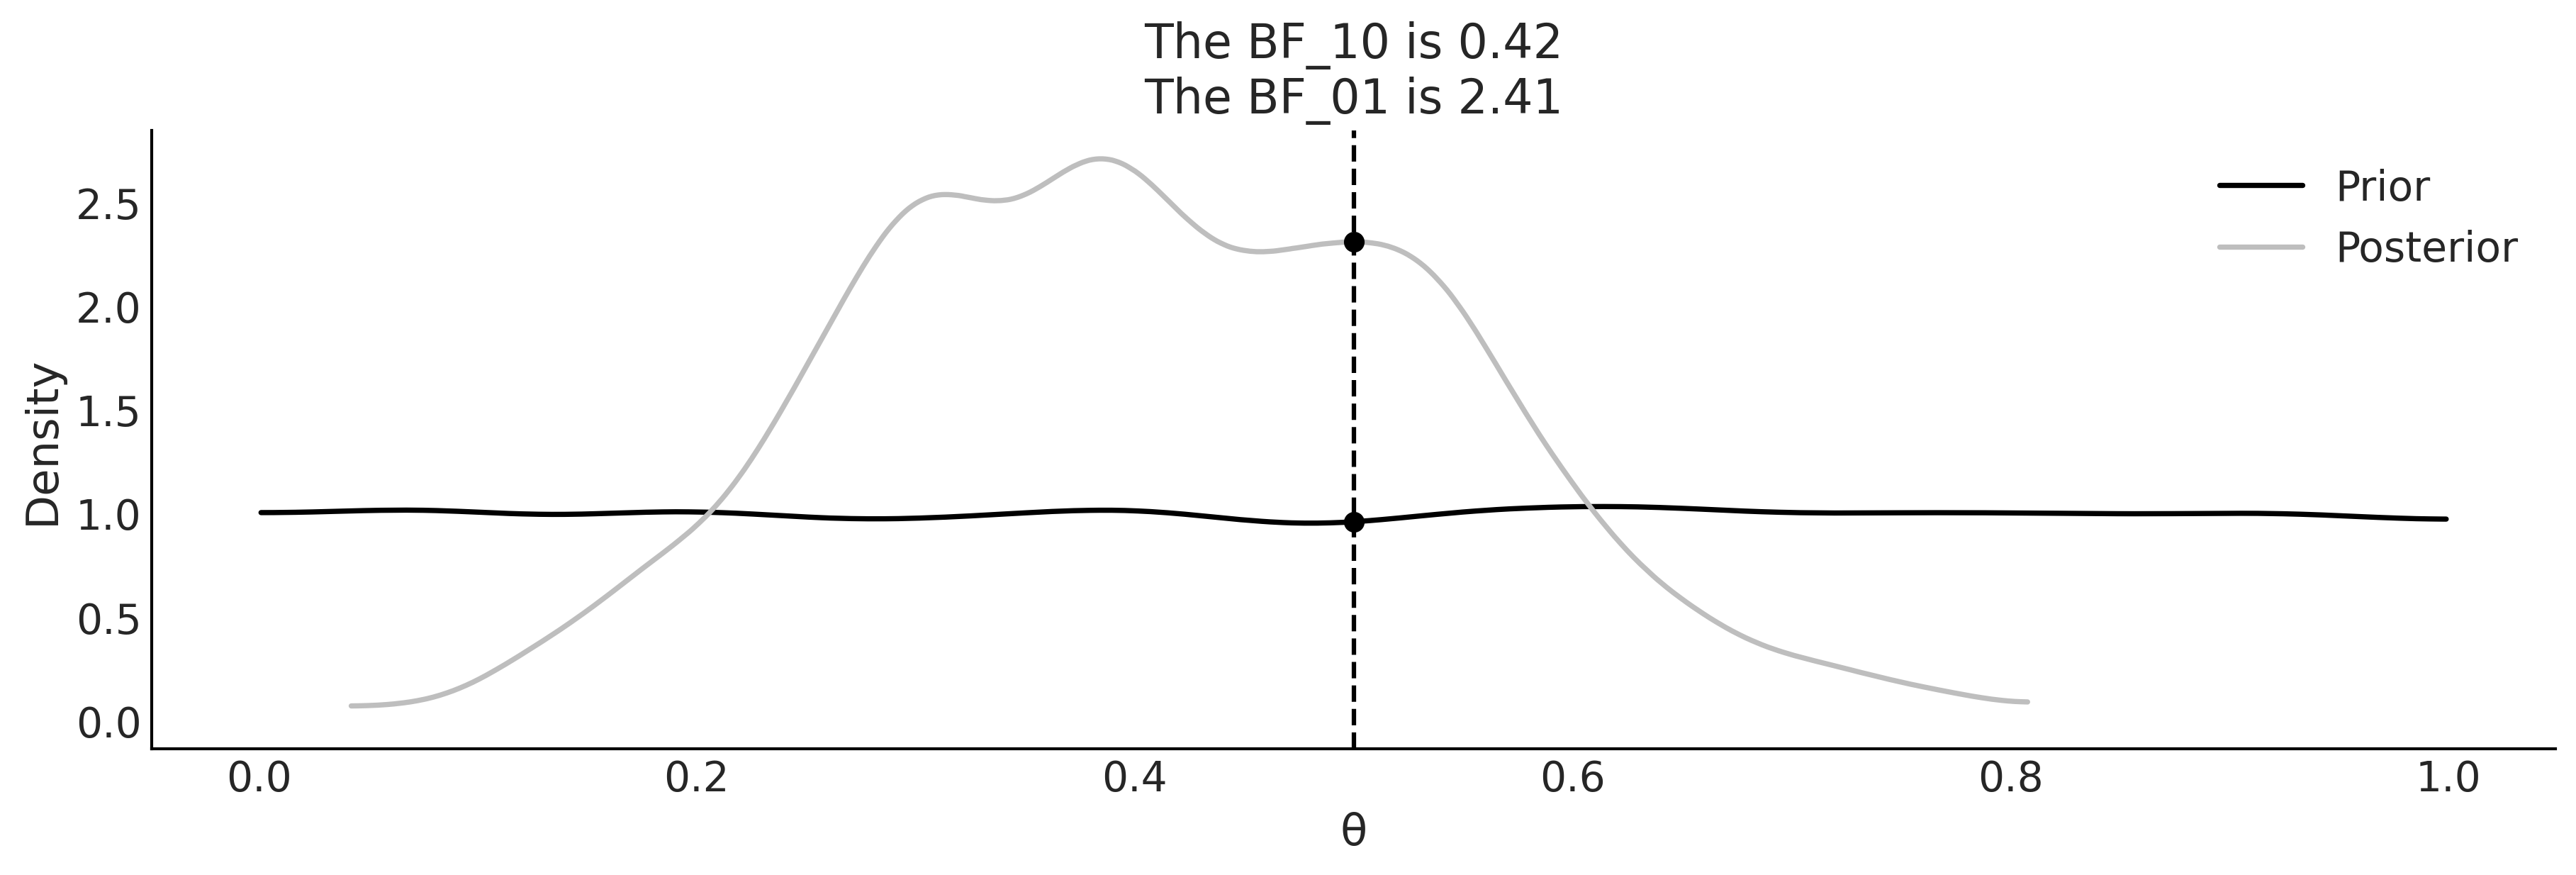

In [ ]:
az.plot_bf(idata, var_name="θ", prior=np.random.uniform(0, 1, 10000), ref_val=0.5, figsize=(12, 4), colors=["C0", "C2"])

**Case when α=β=1.0**:
We can see that the value of BF_01 is 1.3, which means that the value of θ = 0.5 is 1.3 times more likely under the posterior distribution than under the prior distribution.The value of BF_10 is just the inverse, approximately 0.8.       
**Case when alpha and beta are different**:
We can see that the value of BF_01 is 2.41, which means that the value of θ = 0.5 is 2.41 times more likely under the posterior distribution than under the prior distribution.The value of BF_10 is just the inverse, approximately 0.42.    
We can deduce from here that 2nd case is more likely to occur under posterior distribution than under prior distribution as compared to 1st case.

<Axes: title={'center': 'θ'}>

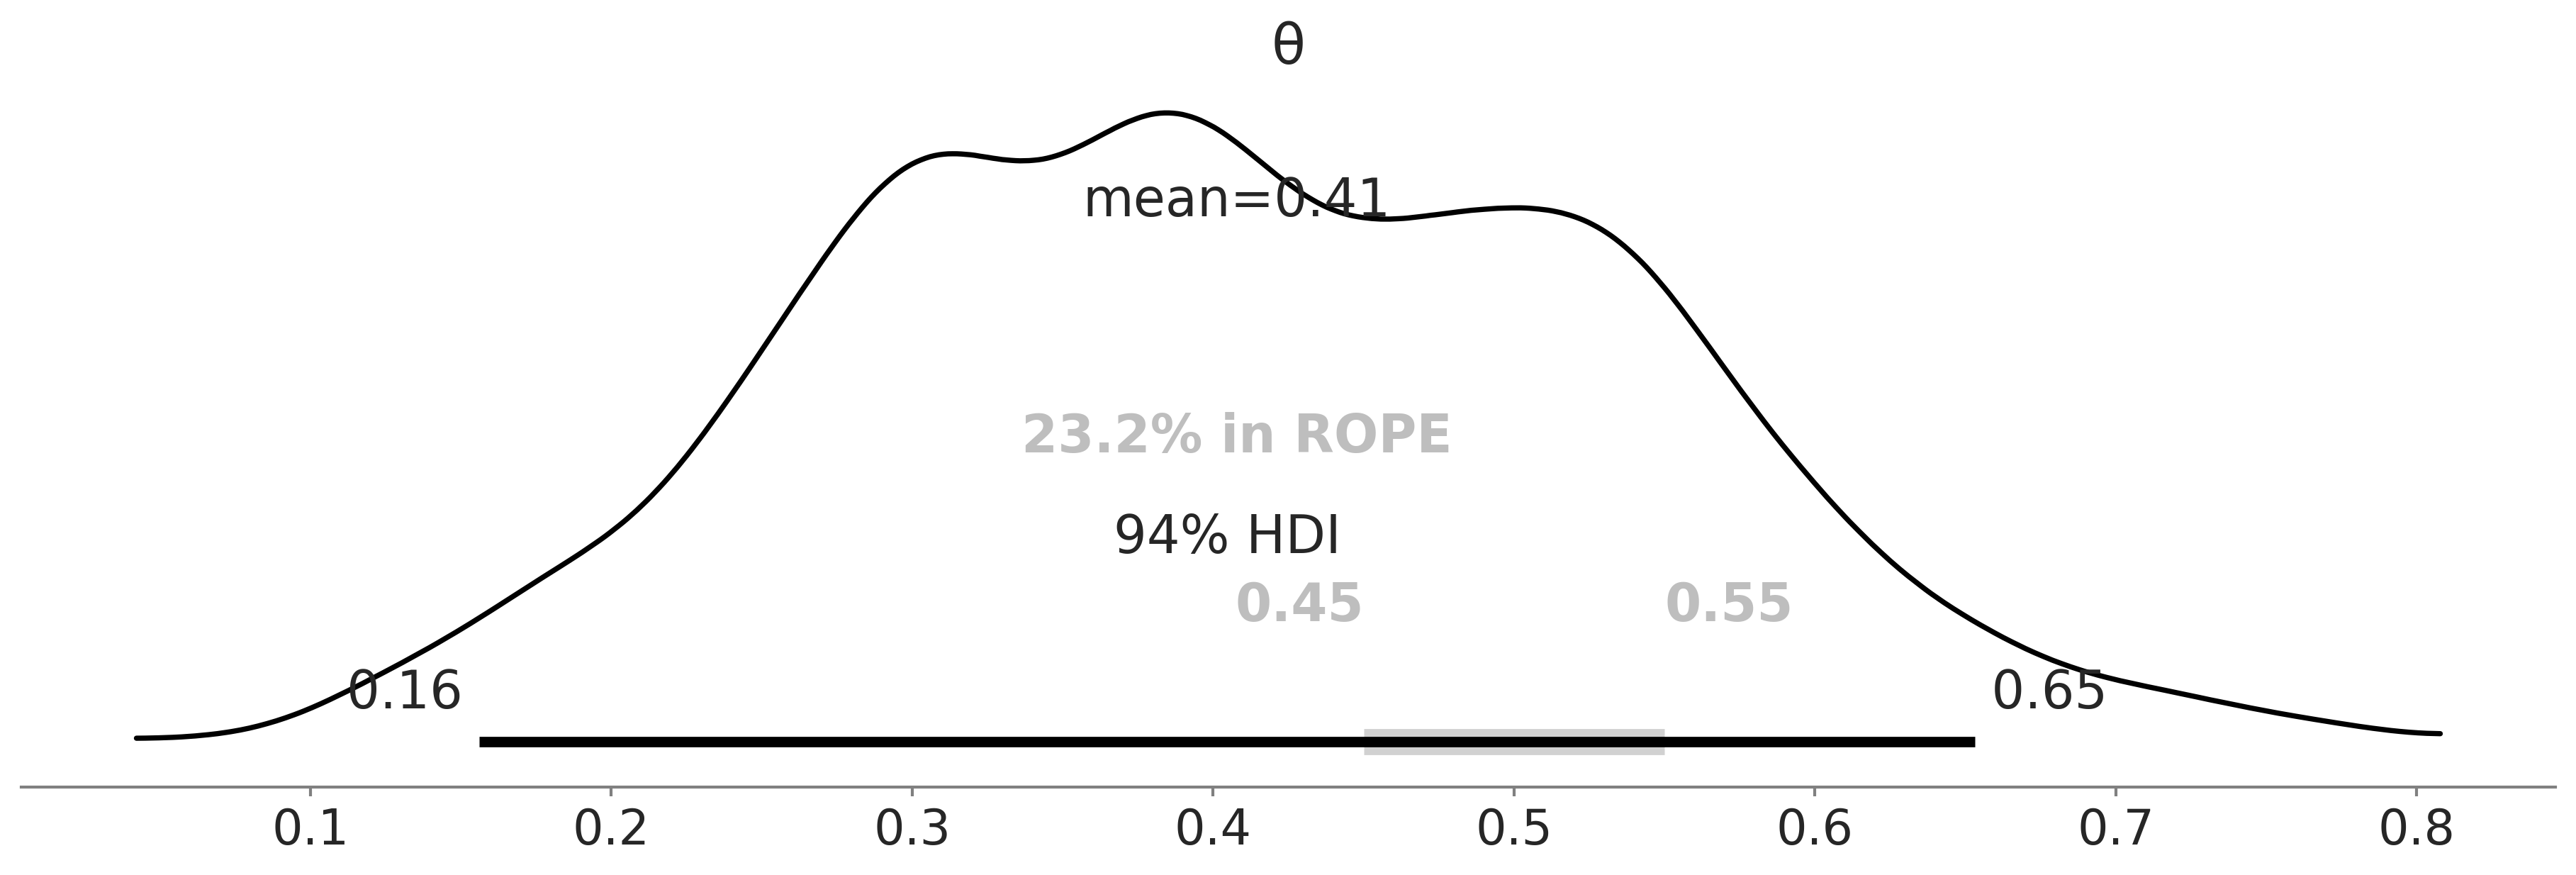

In [ ]:
az.plot_posterior(idata, rope=[0.45, .55], figsize=(12, 4))

If we consider the fair coin chance then this case lies as of 23.2% under ROPE in posterior distribution as compared to 12.8% under the ROPE when alpha=beta=1.0. We can consider this model to be more likely to be fair then the model assumed in week-3 with beta parametes as 1.0